# Clustering & PCA Assignment
- To identify the countries that are in direst need of aid.


*Let's start by importing some libraries as follows...*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

*Let's now get the data*

In [2]:
data = pd.read_csv('Country-data.csv')

*Let's carry out the usual preliminary analysis.*

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- *There is one categorical variable and rest are all numerical in nature.*

In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- *No missing data.*

**Let's now check the data for any outliers.**

In [5]:
data.shape

(167, 10)

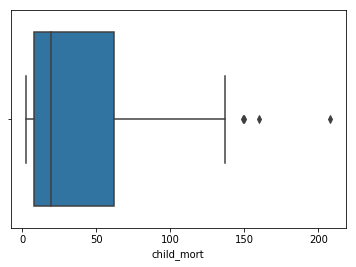

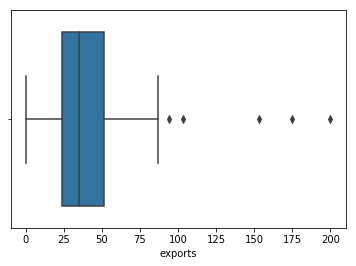

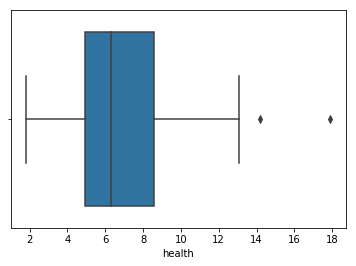

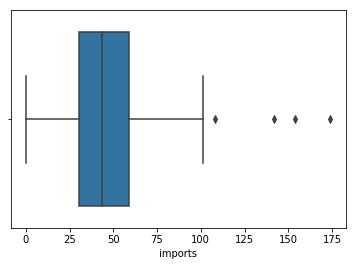

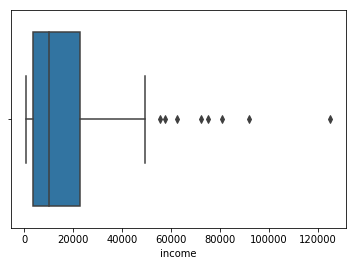

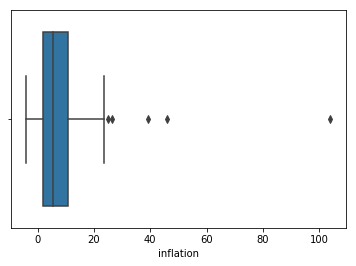

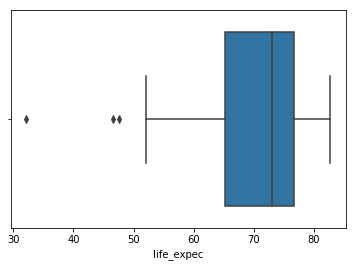

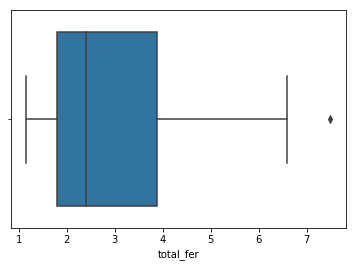

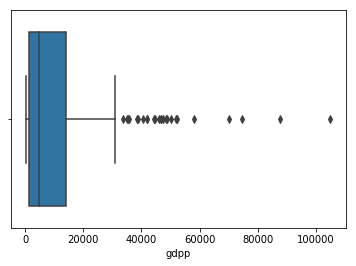

In [6]:
for i in list(data.columns[1:]):
    sns.boxplot(data[i])
    plt.show()

- *All the columns have the presence of outliers in them. But since the data is very small, therefore, let's not remove the outliers.*

In [7]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- *It can be observed that there is difference in the scales of different variables. Therefore, it warrants that Standardization be performed.*

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
cols_to_transform = list(data.columns[1:])
cols_to_transform

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [10]:
new_data = pd.DataFrame(scaler.fit_transform(data[cols_to_transform]))
new_data.columns = cols_to_transform
new_data['country'] = data['country']
new_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


- *Let's now determine the `Hopkins` statistic to determine the clustering tendency of the data.*

In [11]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins_test(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0,n,1), m)
    ujd=[]
    wjd=[]
    for j in range(0, m):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist,_=nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd)/(sum(ujd)+sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H=0
    return H

In [12]:
hopkins_test(new_data.drop('country', axis=1))

0.850063410641324

In [13]:
hopkins_test(new_data.drop('country', axis=1))

0.8256355341335945

In [14]:
hopkins_test(new_data.drop('country', axis=1))

0.8861960744981456

**Since the hopkin's statistic is on the higher side, therefore, clustering can be performed.**

- *Let's now perform* **`PCA`** *algorithm on the above data as follows...*

In [15]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [16]:
X = new_data.iloc[:, :-1]

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

- *Let's now observe the* **`Principal Components`**

In [18]:
components = pca.components_
components

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [19]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

**Let's now visualize the Scree Plot to determine the number of Principal Components that would explain the variance of the data.**

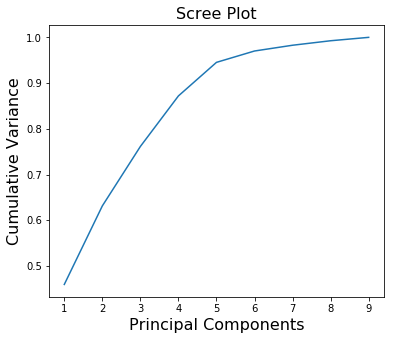

In [20]:
plt.figure(figsize=(6,5))
sns.lineplot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Principal Components', fontsize=16)
plt.ylabel('Cumulative Variance', fontsize=16)
plt.title('Scree Plot', fontsize=16)
plt.show()

- *It can be observed that the first five Principal Components explains more than 90% of the total variance. Therefore, let's take the number of components to be 5.*

In [21]:
pca_2 = PCA(n_components=5, random_state=100)

In [22]:
df_pca = pd.DataFrame(pca_2.fit_transform(X))
df_pca.head()

,0,1,2,3,4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [23]:
df_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [24]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [25]:
df_pca['country'] = data['country']

In [26]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


*Let's also visualize the relationship between principal components*

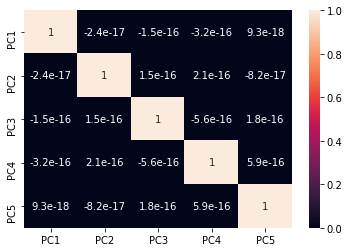

In [27]:
sns.heatmap(df_pca.corr(), annot=True)
plt.show()

- *It can be clearly observed that the correlation between the principal components is practically zero.*

## K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
ssd = []
clusters = [2, 3, 4, 5, 6, 7, 8]
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

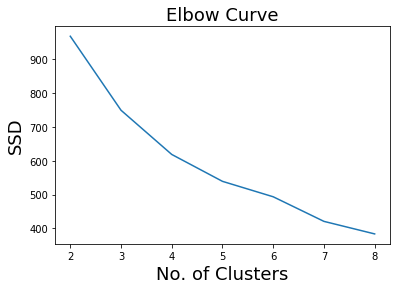

In [30]:
sns.lineplot(x = clusters, y = ssd)
plt.xlabel('No. of Clusters', fontsize=18)
plt.ylabel('SSD', fontsize=18)
plt.title('Elbow Curve', fontsize=18)
plt.show()

- *As per the Elbow curve, optimal number of clusters seems to be 3. Let's also carry out Silhouette analysis.*

In [31]:
from sklearn.metrics import silhouette_score
sil = []
for i in clusters:
    kmeans = KMeans(i, random_state=100)
    kmeans.fit(df_pca.iloc[:, :-1])
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca.iloc[:, :-1], labels)
    sil.append(silhouette_avg)

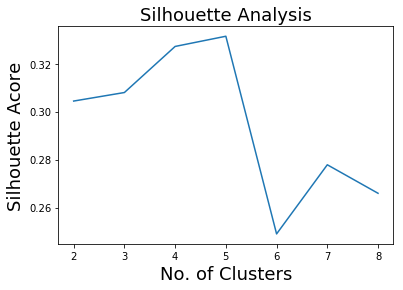

In [32]:
sns.lineplot(x = clusters, y = sil)
plt.xlabel('No. of Clusters', fontsize=18)
plt.ylabel('Silhouette Acore', fontsize=18)
plt.title('Silhouette Analysis', fontsize=18)
plt.show()

- *As per the Silhouette Analysis, 5 clusters has the highest value but there is no significant difference in values for clusters 3 or 4 or 5. Therefore, taking both the Silhouette score and Elbow curve into consideration, let's take the number of clusters to be 3.*

In [33]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(df_pca.iloc[:, :-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [34]:
data['KMeans Labels'] = kmeans.labels_

In [35]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


- *Let's have a look at the countries that belongs to these clusters respectively.*

In [36]:
data[data['KMeans Labels'] == 0]['country']

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

**From our general knowlegde, it can be observed that `Cluster 0` mostly contains rich, developed countries.**

In [37]:
data[data['KMeans Labels'] == 1]['country']

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

**`Cluster 1` mostly comprises of countries that can be classified as developing (at a good rate) but not developed yet.**

In [38]:
data[data['KMeans Labels'] == 2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

**`Cluster 2` can be classified as under-developed countries (growth rate very low).**

***Based on this classification of developed, developing & under-developed, we can predict that the countries belonging to cluster 2 are in the direst need of aid. But, let's confirm  that by performing some visualizations.***

- *Let's now carry out some visualization with regards to the variables `child_mort`, `income`, `gdpp` as follows...*

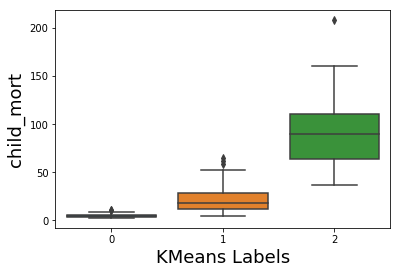

In [39]:
sns.boxplot(x=data['KMeans Labels'], y=data['child_mort'])
plt.xlabel('KMeans Labels', fontsize=18)
plt.ylabel('child_mort', fontsize=18)
plt.show()

- *`child_mort` (Child Mortality) is a big concern for the countries belonging to cluster 2 followed by cluster 1. Countries belonging to cluster 0 are the best performers with very low levels of child mortality. Therfore, it can be concluded that in terms of child mortality, countries belonging to cluster 2 are in dire need of aid.*

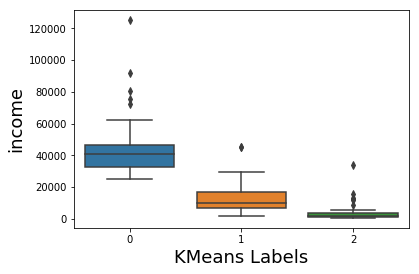

In [40]:
sns.boxplot(x=data['KMeans Labels'], y=data['income'])
plt.xlabel('KMeans Labels', fontsize=18)
plt.ylabel('income', fontsize=18)
plt.show()

- *Considereing the variable `income`, here again custer 0 is the best performer whereas cluster 2 is the worst performer and cluster 1 comes in the middle Here again, cluster 2 needs the most attention in terms of aid.*

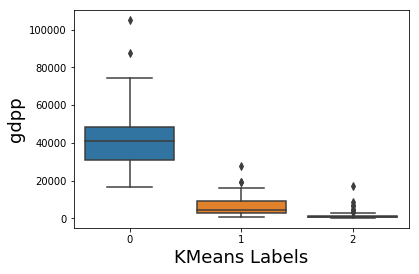

In [41]:
sns.boxplot(x=data['KMeans Labels'], y=data['gdpp'])
plt.xlabel('KMeans Labels', fontsize=18)
plt.ylabel('gdpp', fontsize=18)
plt.show()

*Considereing `gdpp` (GDP per capita), it can be observed yet again that cluster 0 countries are the best performers with the highest GDP per capita and cluster 2 countries are the worst performers. Cluster 1 again comes in the middle. Therefore, it can be concluded that cluster 2 is in utter need of aid.*

## Hierarchical Clustering
- ***SINGLE LINKAGE***

In [42]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

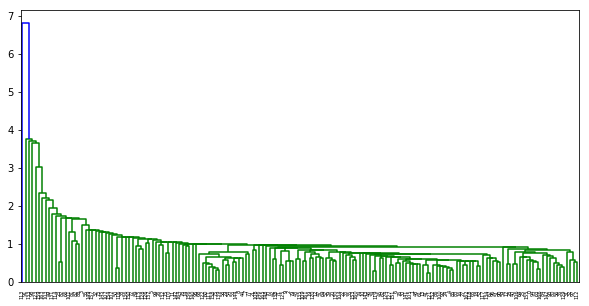

In [43]:
single = linkage(df_pca.iloc[:,:-1], method='single')
plt.figure(figsize=(10,5))
dendrogram(single)
plt.show()

- *Dendrogram suggests that single linkage clustering has not been effective.*
- *Let's take the number of clusters to be 3.*

In [44]:
single_labels = cut_tree(single, n_clusters=3).reshape(-1,)

In [45]:
data['Single Labels'] = single_labels

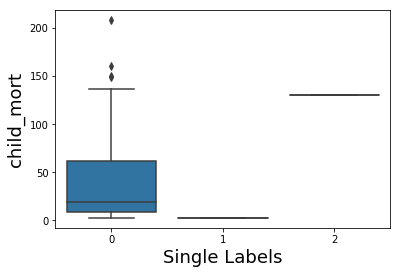

In [46]:
sns.boxplot(x=data['Single Labels'], y=data['child_mort'])
plt.xlabel('Single Labels', fontsize=18)
plt.ylabel('child_mort', fontsize=18)
plt.show()

- *It can be clearly observed that almost all the countries are included disproportionately in just one cluster i.e. cluster 0 whereas cluster 1 and 2 have only one country each. This clearly suggests that single linkage hierarchical clustering is certainly not an effective way for clustering in this case.*
<br><br>
- *Let's now move on to `Complete Linkage Hierarchical Clustering`.*

## Hierarchical Clustering
- ***COMPLETE LINKAGE***

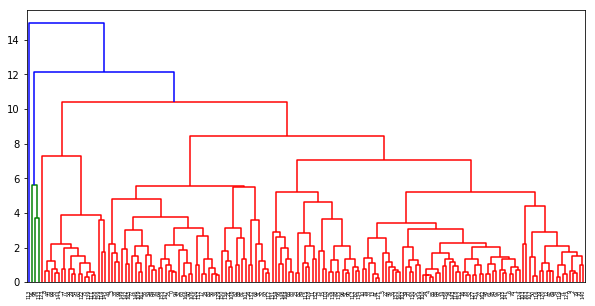

In [47]:
complete = linkage(df_pca.iloc[:,:-1], method='complete')
plt.figure(figsize=(10,5))
dendrogram(complete)
plt.show()

- *It can be observed from the dendrogram that a somewhat better clustering is obtained in terms of complete linkage as compared to single linkage.*
- *Let's again choose the number of clusters to be 3.*

In [48]:
data['Complete Labels'] = cut_tree(complete, n_clusters=3).reshape(-1,)

In [49]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans Labels,Single Labels,Complete Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0


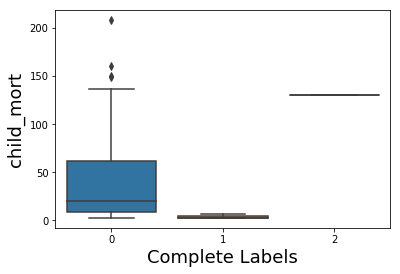

In [50]:
sns.boxplot(x=data['Complete Labels'], y=data['child_mort'])
plt.xlabel('Complete Labels', fontsize=18)
plt.ylabel('child_mort', fontsize=18)
plt.show()

- *Again, with complete linkage, cluster 0 contains almost all the data points (countries) whereas in 1 and 2, the number is very low. Therefore, it can be concluded that both single as well as complete linkage hierarchical clustering are not effective in this case.*

### In this clustering analysis, KMeans seems to be the most effective way of clustering.

- *Let's also visualize these diffeent clusters by means of a scatter plot.*

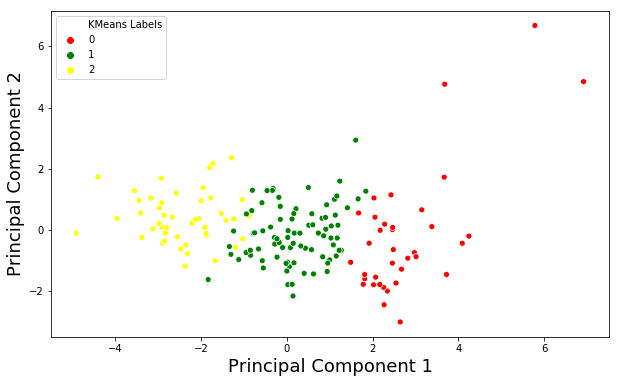

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df_pca['PC1'], df_pca['PC2'], hue=data['KMeans Labels'], palette=['red', 'green', 'yellow'],)
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)
plt.show()

- *It can be clearly visualized that all the clusters are separated from each other. However, some overlap can be seen between cluster 1 and cluster 2 but overall, clusters are separated.*
- *Another thing to notice about the Principal Components that the correlation between them is almost 0.*

<br><br><br>
**Let's also visualize the scatterplot of some original variables.**

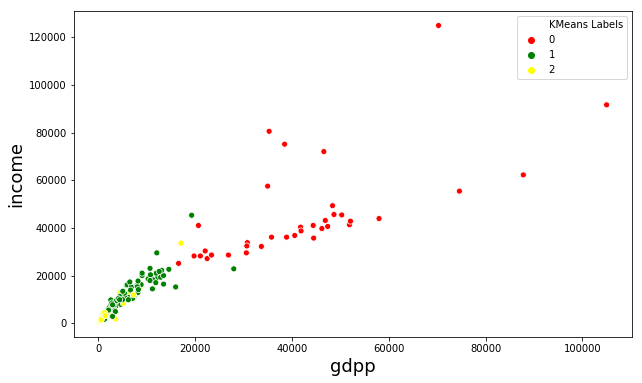

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['gdpp'], data['income'], hue=data['KMeans Labels'], palette=['red', 'green', 'yellow'])
plt.xlabel('gdpp', fontsize=18)
plt.ylabel('income', fontsize=18)
plt.show()

- *Using the original variables `income` and `gdpp`, we can observe the different clusters. However, the scatter plot based on Principal Components is much better for visualization. Apart from that, high correlation between the said variabls can be observed.*

- *Let's also select 10 countries that are in direst need of aid. This will be selected by considering `gdpp` of the countries. GDP per capita is the criteria of selection given the fact that if a persona has enough personal income then that person is not in much need of aid as the person can afford the basic needs both for himself/ herself and family. Countries with lowest GDP per capita probably are in most need of aid.*

In [53]:
data[data['KMeans Labels']==2].sort_values(by='gdpp', ascending=True)['country'][:10]

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

**Let's use a barplot as well to visualize the `Cluster 2` countries as per their GDP per capita.**

In [54]:
for_plot = data[data['KMeans Labels'] == 2].sort_values(by='gdpp', ascending=True)

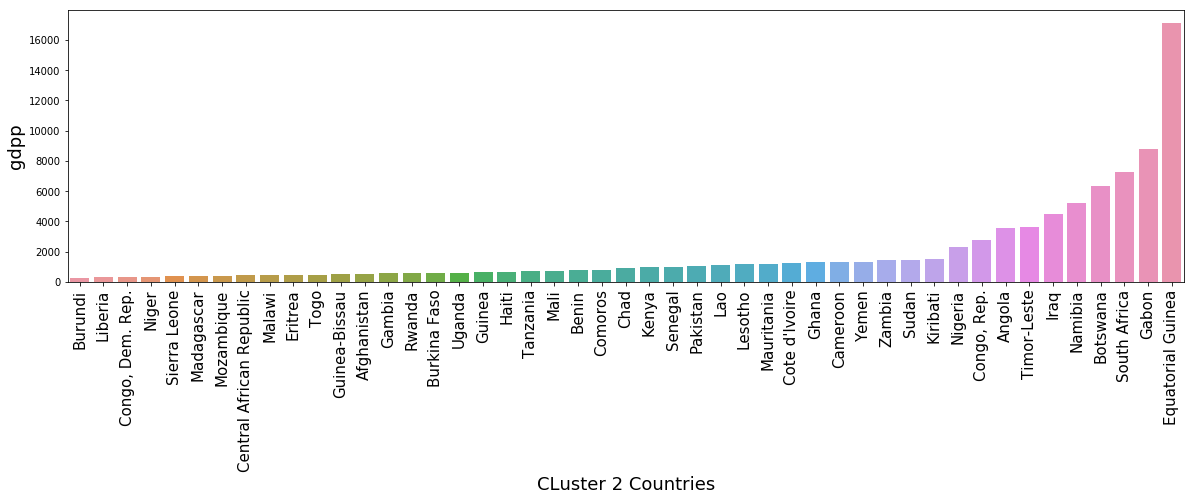

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(x=for_plot['country'], y=for_plot['gdpp'])
plt.xlabel('CLuster 2 Countries', fontsize=18)
plt.ylabel('gdpp', fontsize=18)
plt.xticks(rotation=90, fontsize=15)
plt.show()

### The 10 countries that should be provided the aid are as follows:
- #### 1. *Burundi*
- #### 2. *Liberia*
- #### 3. *Congo, Dem. Rep.*
- #### 4. *Niger*
- #### 5. *Sierra Leone*
- #### 6. *Madagascar*
- #### 7. *Mozambique*
- #### 8. *Central African Republic*
- #### 9. *Malawi*
- #### 10. *Eritrea*

**NOTE:** *Many other countries beyond first ten have GDP per capita on similar lines and hence can also be considered.*